In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Ahmedabad.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Eat Punjab,750,"North Indian,Chinese,Fast Food",Ahmedabad,Chandkheda,Casual Dining,"1030am to 330pm,630pm to 1130pm(Mon-Sun)",Good,3.7,1345
1,9834 The Fruit Truck,400,"Beverages,Desserts",Ahmedabad,Food Truck Park,Food Truck,9am to 1am(Mon-Sun),Very Good,4.4,561
2,The Esplendido Cafe,800,"Cafe,American,Italian,Chinese,Beverages",Ahmedabad,Navrangpura,Café,"1130am to 1130pm(Mon-Tue),12noon to 1130pm...",Very Good,4.4,1013
3,Makeba - The Lounge Cafe,1000,"Cafe,Italian,Mexican,Healthy Food",Ahmedabad,Vastrapur,Café,12noon to 12midnight(Mon-Sun),Very Good,4.2,399
4,Honest,700,"North Indian,South Indian,Fast Food,Chinese",Ahmedabad,Prahlad Nagar,Casual Dining,11am to 12midnight(Mon-Sun),Good,3.9,832


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 10 columns):
Name                1937 non-null object
Price               1937 non-null int64
Cuisine_Category    1936 non-null object
City                1937 non-null object
Region              1937 non-null object
Cuisine_Type        1937 non-null object
Timing              1934 non-null object
Rating_Types        1937 non-null object
Rating              1937 non-null float64
Votes               1937 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 151.4+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,1937.000000,1937.000000,1937.000000
mean,446.566856,3.504182,166.273103
std,234.470863,0.435639,278.225989
min,0.000000,2.100000,4.000000
25%,300.000000,3.200000,19.000000
50%,400.000000,3.500000,53.000000
75%,600.000000,3.800000,185.000000
max,1900.000000,4.900000,2922.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    1
City                0
Region              0
Cuisine_Type        0
Timing              3
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Shreejikrupa             3
Shree Marutinandan       3
Jalaram Parotha House    3
Friends Coffee Bar       3
Tea Post                 3
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Satellite                      160
Bodakdev                       156
Navrangpura                    143
Airport Gandhinagar Highway     88
Vastrapur                       86
Chandkheda                      81
Prahlad Nagar                   81
Mani Nagar                      80
Thaltej                         70
Bopal                           67
Name: Region, dtype: int64

Text(0.5,1,'Region')

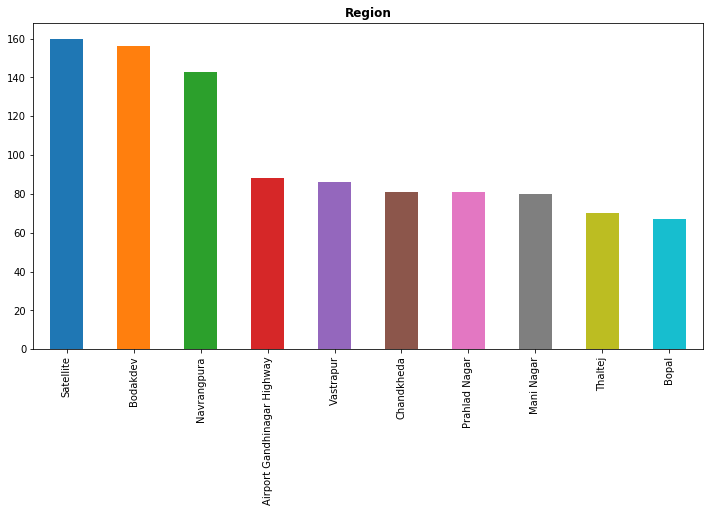

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

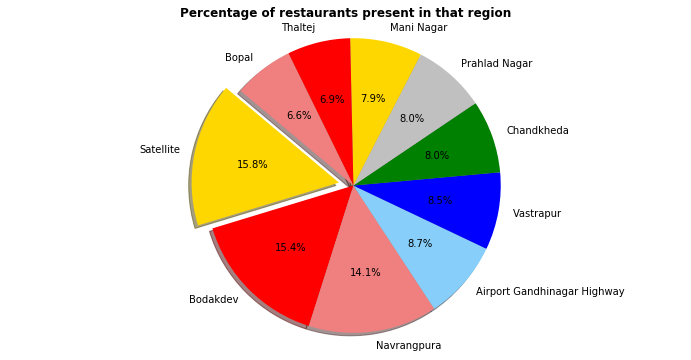

In [11]:
plt.figure(figsize = (12,6))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average        902
Good           711
Very Good      278
Excellent       31
Poor             6
Baik             2
Çok iyi          1
Sangat Baik      1
Veľmi dobré      1
Buono            1
Name: Rating_Types, dtype: int64

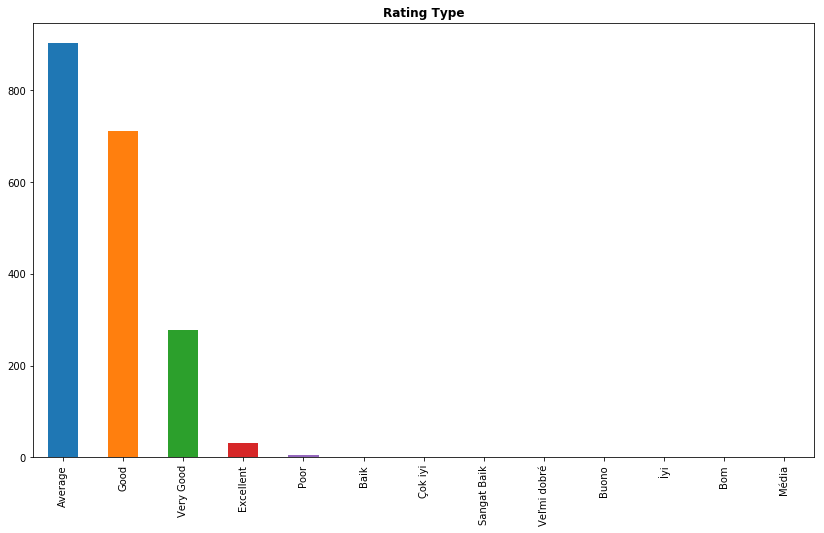

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       776
Casual Dining     520
none              216
Café              131
Dessert Parlor     93
Bakery             57
Sweet Shop         33
Food Court         28
Beverage Shop      26
Food Truck         17
Name: Cuisine_Type, dtype: int64

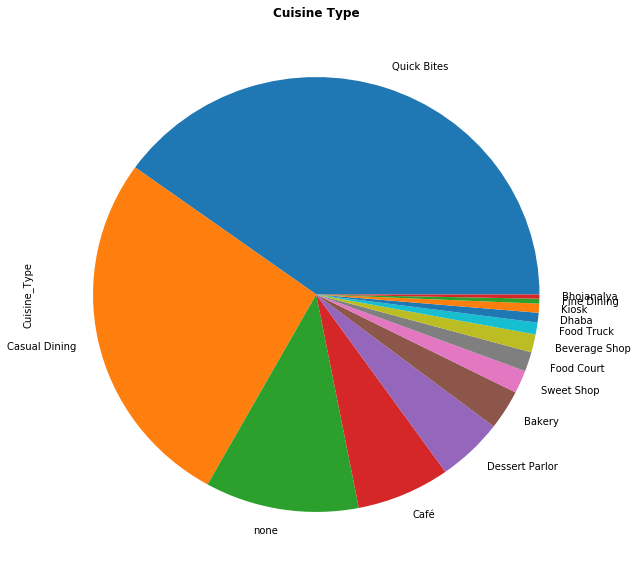

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [ ]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [16]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.50434557682358


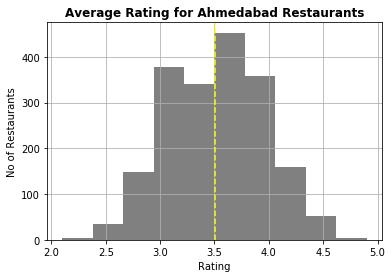

In [22]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Ahmedabad Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Ahmedabad is found to be around 3.4

# Top cuisines in Ahmedabad 

In [20]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

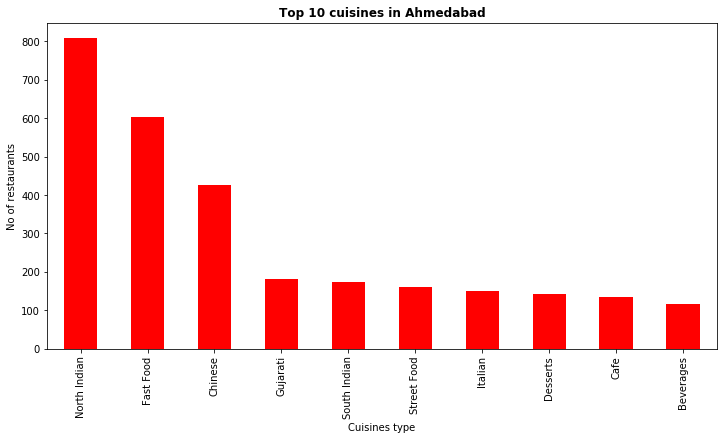

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Ahmedabad',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

300     319
400     257
500     170
200     166
600     166
250     143
350     114
450      89
700      83
550      78
800      76
150      64
100      40
650      38
1000     36
900      28
750      19
1200     14
1100      9
850       5
Name: Price, dtype: int64

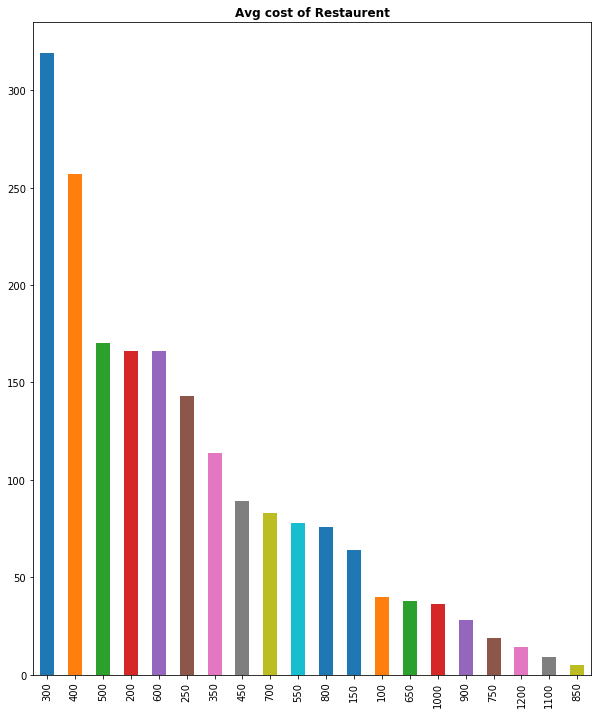

In [25]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

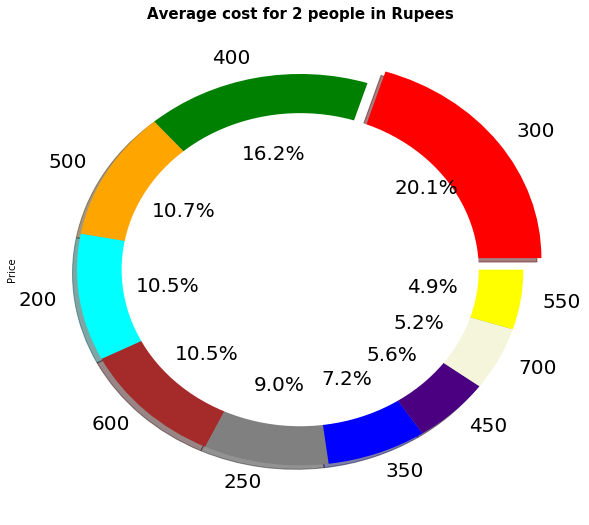

In [27]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300